# Figure 6

In [6]:
dib_ncgr_kmers <- read.csv("~/Documents/UCDavis/dib/MMETSP/git/MMETSP/assembly_evaluation_data/unique_kmers.csv")
unique_dammit_names_numbers <- read.csv("~/Documents/UCDavis/dib/MMETSP/git/MMETSP/assembly_evaluation_data/unqiue_gene_names_ncgr_dib.csv")
unique_dammit_names <- read.csv("~/Documents/UCDavis/dib/MMETSP/git/MMETSP/assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
#head(dib_ncgr_kmers)
#dim(dib_ncgr_kmers)
#head(unique_dammit_names)
#dim(unique_dammit_names)

The following are MMETSP samples with multiple sequencing runs, each with separate re-assemblies (see [explanation](https://github.com/ljcohen/MMETSP/blob/master/notebooks/MMETSP_imicrobe_NCBI-SRA_sample_id_verification.ipynb)). These are excluded from all quality analyses: 

In [7]:
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018","MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196","MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")

In [8]:
# Only use 7 most common phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")

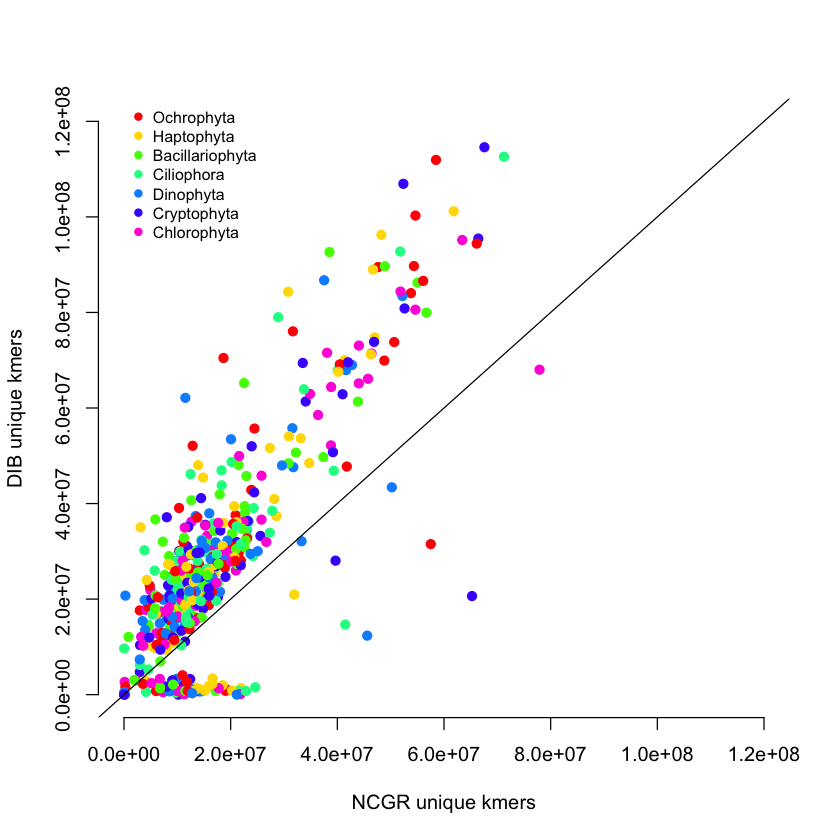

In [9]:
dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
#dim(dib_ncgr_kmers)
#head(dib_ncgr_kmers)
dib_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$DIB>dib_ncgr_kmers$NCGR),]
ncgr_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$NCGR>dib_ncgr_kmers$DIB),]
#dim(dib_greater)
#dim(ncgr_greater)
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
plot(dib_ncgr_kmers$Unique_kmers,dib_ncgr_kmers$Unique_kmers_assembly, ylim=c(-1,120000000),xlim=c(-1,120000000),ylab = "DIB unique kmers",xlab="NCGR unique kmers",col=rainbow(length(unique(dib_ncgr_kmers$Phylum))),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),col=rainbow(length(unique(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")

# Figure 7

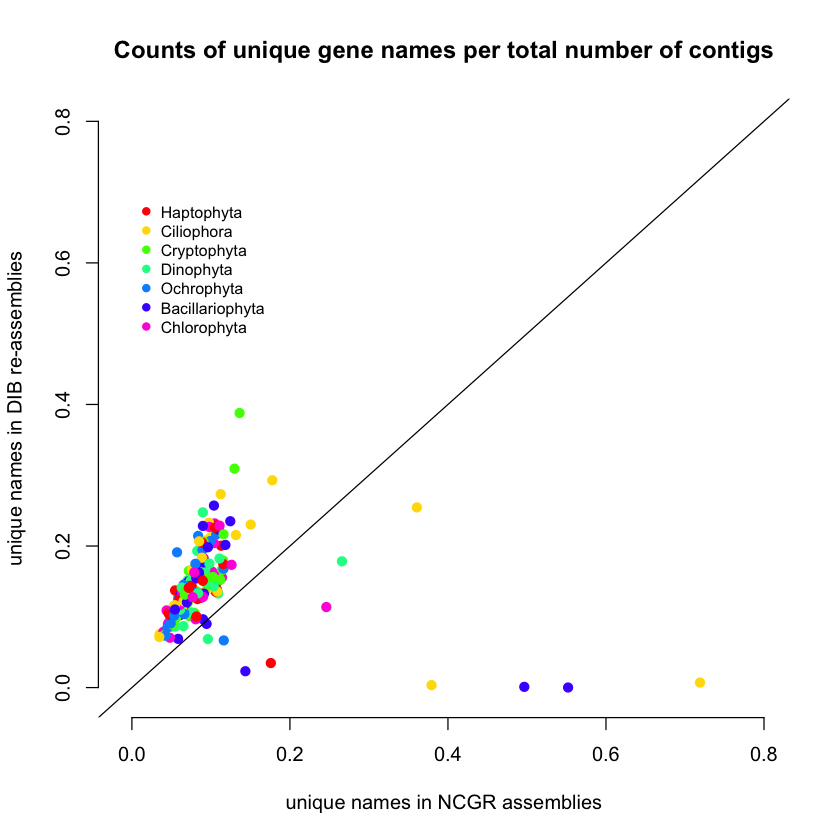

In [10]:
unique_dammit_names <- unique_dammit_names[,c(2:4)]
colnames(unique_dammit_names) <- c("SampleName","NCGR","DIB")
#head(unique_dammit_names)
unique_dammit_names <- merge(unique_dammit_names,dib_ncgr_kmers,by="SampleName")
unique_dammit_names <- unique_dammit_names[,c(1:4)]
#head(unique_dammit_names)
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
#dim(unique_dammit_names)
unique_dammit_names <- unique_dammit_names[unique_dammit_names$Phylum %in% sub_phy,]
#head(sub)
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,0.8),xlim=c(-0.01,0.8),col=rainbow(length(unique(unique_dammit_names$Phylum))),pch=19,ylab = "unique names in DIB re-assemblies",xlab="unique names in NCGR assemblies",main="Counts of unique gene names per total number of contigs",frame.plot = FALSE)
abline(0,1)
legend(0,0.7,legend=unique(as.character(unique_dammit_names$Phylum)),col=rainbow(length(unique(unique_dammit_names$Phylum))),cex=0.8, pch=19,bty="n")